In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Objectifs

L’objectif de ce projet est d’utiliser la classification non supervisée pour résumer les variations de
la consommation d’énergie de 100 appartements, observée toutes les 30 minutes durant 91 jours
consécutifs. Plus spécifiquement, on cherche ici à obtenir une classification des jours, uniforme pour
l’ensemble des appartements. Une telle classification pourra être utile, par exemple, dans le cadre
de la surveillance d’un réseau d’électricité.

## Données

In [23]:
# Chargement des données
X = np.loadtxt("http://allousame.free.fr/mlds/donnees/X.txt", delimiter=" ")
APPART = np.loadtxt("http://allousame.free.fr/mlds/donnees/APPART.txt")
JOUR = np.loadtxt("http://allousame.free.fr/mlds/donnees/JOUR.txt")

## Partie 1 : Transformation du tableau X en un tableau de données catégorielles Y

L’objectif de cette partie est de regrouper les lignes du tableau X en K classes, puis, à partir des
labels des classes, de transformer les données journalières initiales (X) en un tableau de données
catégorielles Y (100 lignes et 91 colonnes).

In [14]:
# Nombre de classes K
K = 5  

# Appliquer K-means sur les données
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Créer le tableau de données catégorielles Y
Y = pd.DataFrame(index=range(1, 101), columns=range(1, 92))

# Remplir le tableau Y avec les labels des clusters en utilisant JOUR
for i in range(1, 101):
    labels_appart = labels[APPART == i]
    jours_appart = JOUR[APPART == i].astype(int)
    Y.loc[i, jours_appart] = labels_appart

# Convertir le DataFrame en une matrice NumPy
Y_matrix = Y.values


# Enregistrement du résultat
Y.to_csv("tableau_Y.csv", index_label="APPART")


# Afficher la matrice
print(Y_matrix)

[[2 2 2 ... 1 0 0]
 [1 1 2 ... 1 0 0]
 [4 4 2 ... 1 0 0]
 ...
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]]


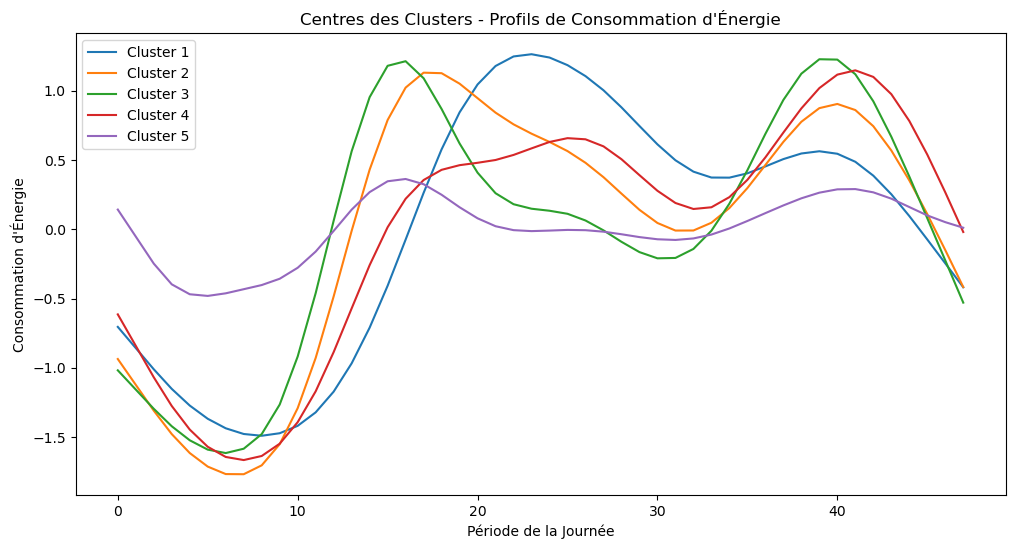

In [15]:
# Visualisation des centres des clusters
plt.figure(figsize=(12, 6))
for cluster in range(K):
    plt.plot(kmeans.cluster_centers_[cluster], label=f"Cluster {cluster + 1}")

plt.title("Centres des Clusters - Profils de Consommation d'Énergie")
plt.xlabel("Période de la Journée")
plt.ylabel("Consommation d'Énergie")
plt.legend()
plt.show()

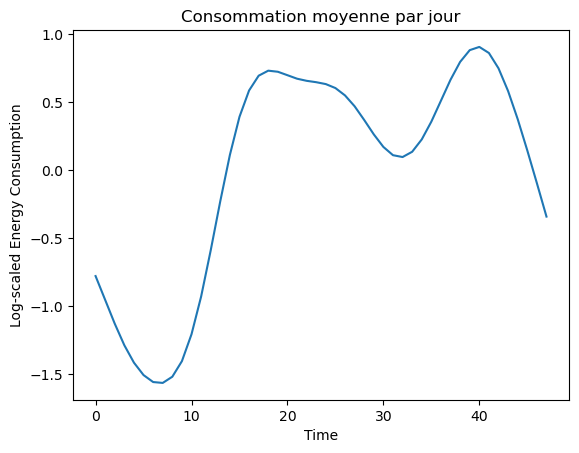

In [16]:
# Analyse temporelle
moyenne_par_jour = X.mean(axis=0)
plt.plot(moyenne_par_jour)
plt.title("Consommation moyenne par jour")
plt.xlabel("Time")
plt.ylabel("Log-scaled Energy Consumption")
plt.show()


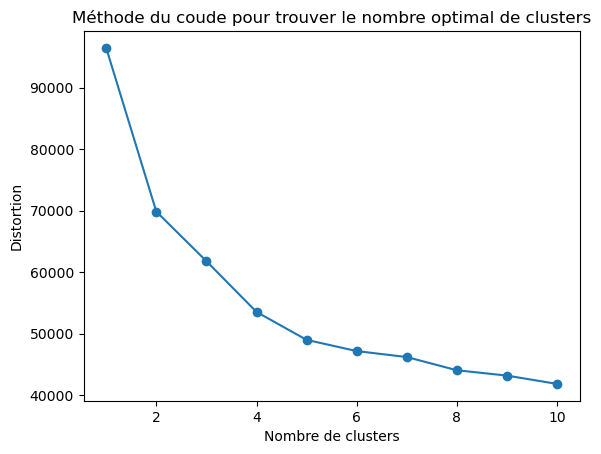

In [17]:
# Méthode du coude pour trouver le nombre optimal de clusters
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Visualisation
plt.plot(K_range, distortions, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distortion')
plt.show()


In [18]:
# Nombre de classes K
K = 3  # Vous pouvez ajuster ce nombre selon votre besoin

# Appliquer K-means sur les données
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Créer le tableau de données catégorielles Y
Y = pd.DataFrame(index=range(1, 101), columns=range(1, 92))

# Remplir le tableau Y avec les labels des clusters en utilisant JOUR
for i in range(1, 101):
    labels_appart = labels[APPART == i]
    jours_appart = JOUR[APPART == i].astype(int)
    Y.loc[i, jours_appart] = labels_appart

# Convertir le DataFrame en une matrice NumPy
Y_matrix = Y.values

# Afficher la matrice
print(Y_matrix)

[[2 2 2 ... 2 0 0]
 [2 2 2 ... 1 0 0]
 [1 1 2 ... 2 0 0]
 ...
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]]


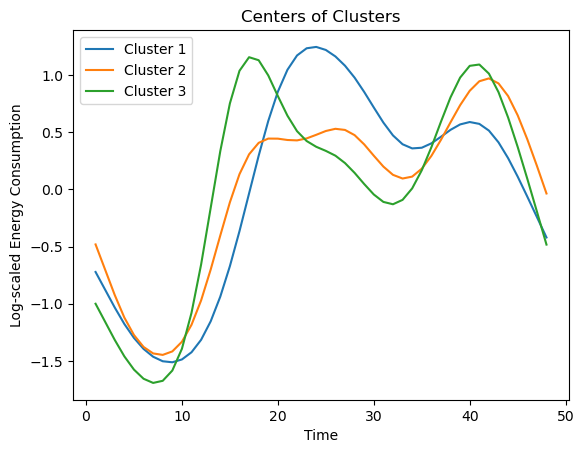

In [19]:
# Afficher les centres des clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=range(1, 49))

# Visualisation des résultats
for cluster in range(K):
    plt.plot(cluster_centers.iloc[cluster], label=f"Cluster {cluster + 1}")

plt.title("Centers of Clusters")
plt.xlabel("Time")
plt.ylabel("Log-scaled Energy Consumption")
plt.legend()
plt.show()


## Partie 2

Silhouette Score: 0.07563114507469917


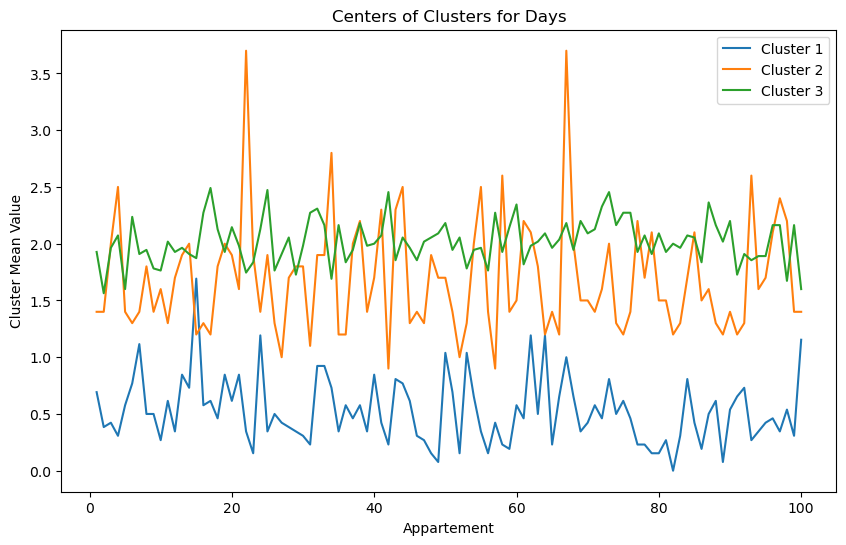

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Chargement des données
Y = pd.read_csv("tableau_Y.csv", index_col="APPART")

# Nombre de classes K pour la nouvelle classification
K_days = 3

# Appliquer K-means sur les données catégorielles des jours
kmeans_days = KMeans(n_clusters=K_days, random_state=42, n_init='auto')
labels_days = kmeans_days.fit_predict(Y.T)  # Transposée car on veut clusteriser les jours, pas les appartements

# Silhouette Score pour évaluer la qualité de la classification
silhouette_avg = silhouette_score(Y.T, labels_days)
print(f"Silhouette Score: {silhouette_avg}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
for cluster in range(K_days):
    cluster_days = Y.columns[labels_days == cluster]
    plt.plot(Y[cluster_days].mean(axis=1), label=f"Cluster {cluster + 1}")

plt.title("Centers of Clusters for Days")
plt.xlabel("Appartement")
plt.ylabel("Cluster Mean Value")
plt.legend()
plt.show()
